## Malignant Melanoma Exploratory Data Analysis in R via Jupyter Notebook
Written By: Heidi   

Here we will explore the [**Melanoma**](https://stat.ethz.ch/R-manual/R-devel/library/boot/html/melanoma.html) dataset through exploratory data analysis (EDA).

**Time Frame Conducted:** 1962 - 1977    
**Location:** Department of Plastic Surgery, University Hospital of Odense, Denmark   
**Research Question:** Does thickness and/or ulcerated tumors have an increase chance of death from malignant melanoma?  

**Synopsis of Study:** Measurements were made on patients with malignant melanoma with each patient's tumor removed. During the surgery the tumor is removed with around 2.5cm of the surrounding skin. Measurements of thickness and ulcerated presence were taken as these variables were predicted to increase the chance of death from the disease. Patients were followed until the end of 1977.

This dataset consist of 205 observations and 7 variables:

VARIABLE|DESCRIPTION
-|:---
time|Survival time in days since the operation, possibly censored.
status|The patients status at the end of the study. 1 indicates that they had died from melanoma, 2 indicates that they were still alive and 3 indicates that they had died from causes unrelated to their melanoma.
sex|The patients sex; 1=male, 0=female.
age|Age in years at the time of the operation.
year|Year of operation.
thickness|Tumour thickness in mm.
ulcer|Indicator of ulceration; 1=present, 0=absent. 
 
**Malignant Melanoma** is the most serious form of skin cancer - it develops from unrepairable DNA damage to skin cells, mainly caused by intense or occasional exposure to ultraviolet (UV) radiation from the sun or tanning beds, mutating skin cells to rapidly multiple and forming malignant tumors. Melanoma are most common in the form of black or brown moles (but can form in tissues as well).   

The skin consists of 3 layers:
 + Epidermis – outermost layer
 + Dermis – second layer
 + Hypodermis – last layer
 
When melanoma is found in the epidermis it is seen as situ or noninvasive, if found in the dermis it is seen as invasive. 

Below is a table showing the stages, descriptions and survival rates for 5 years and 10 years. 
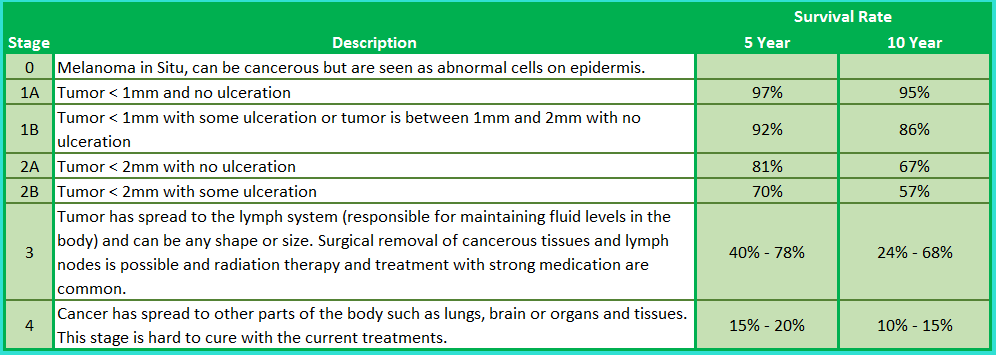

In [ ]:
library(funModeling)
library(dplyr)
library(gridExtra)
library(forcats)
library(rmarkdown)
options(repr.plot.width = 20, repr.plot.height = 8, repr.plot.res = 100)
melanoma <- read.delim("melanoma.txt")

Taking an initial look at the data, some variables could be converted to a different data type for better visualization and understanding

In [2]:
melanoma %>% head(20)
melanoma %>% df_status

,time,status,sex,age,year,thickness,ulcer
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,10,3,1,76,1972,6.76,1
2,30,3,1,56,1968,0.65,0
3,35,2,1,41,1977,1.34,0
4,99,3,0,71,1968,2.90,0
5,185,1,1,52,1965,12.08,1
6,204,1,1,28,1971,4.84,1
7,210,1,1,77,1972,5.16,1
8,232,3,0,60,1974,3.22,1
9,232,1,1,49,1968,12.88,1


   variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1      time       0    0.00    0    0     0     0 integer    194
2    status       0    0.00    0    0     0     0 integer      3
3       sex     126   61.46    0    0     0     0 integer      2
4       age       0    0.00    0    0     0     0 integer     70
5      year       0    0.00    0    0     0     0 integer     13
6 thickness       0    0.00    0    0     0     0 numeric     64
7     ulcer     115   56.10    0    0     0     0 integer      2


Specific variables are factored and relabeled for categorical analysis    
New variable: **Group** is created to see if there are affects between age groups
+ Children $\le$ 17
+ Young Adult $\le$ 35
+ Middle Aged $\le$ 55
+ Senior $\ge$ 56


In [3]:
melanoma$Group=factor(ifelse(melanoma$age<=17, "Children",
                   ifelse(melanoma$age<=35,"Young Adult",
                   ifelse(melanoma$age<=55,"Middle Aged","Senior"))),
                   levels=c("Children","Young Adult","Middle Aged","Senior"))
melanoma$status=as.factor(ifelse(melanoma$status==1,"DEAD",
                              ifelse(melanoma$status==2,"ALIVE","UNRELATED")))
melanoma$ulcer=as.factor(ifelse(melanoma$ulcer==0,"ABSENT","PRESENT"))
melanoma$sex=as.factor(ifelse(melanoma$sex==0,"FEMALE","MALE"))
melanoma$year=as.factor(melanoma$year)

**Unrelated** deaths will be removed since that is not in the interest of the study   
The **time** variable is in days so we will convert it to years for an easier read    
New variable: **Stage** is created based on the thickness of the ulceration (restrictions are based on research)
+ Stage 1: thickness $<$ 1
+ Stage 2: thickness $<$ 2
+ Stage 3: thickness $\ge$ 2+

In [4]:
mela = subset(melanoma,melanoma$status!="UNRELATED")
mela$time = mela$time/365
mela$Stage <- factor(ifelse(mela$thickness < 1,"Stage 1",
                      ifelse(mela$thickness < 2,"Stage 2","Stage 3")))

Since a new variable **Group** was created, let's get a sense of the age distrbution in the dataset and the status of those patients in this distribution   
Majority of the patients in this study is between the ages of 41 and 63.5

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   41.00   54.00   51.52   63.50   95.00 

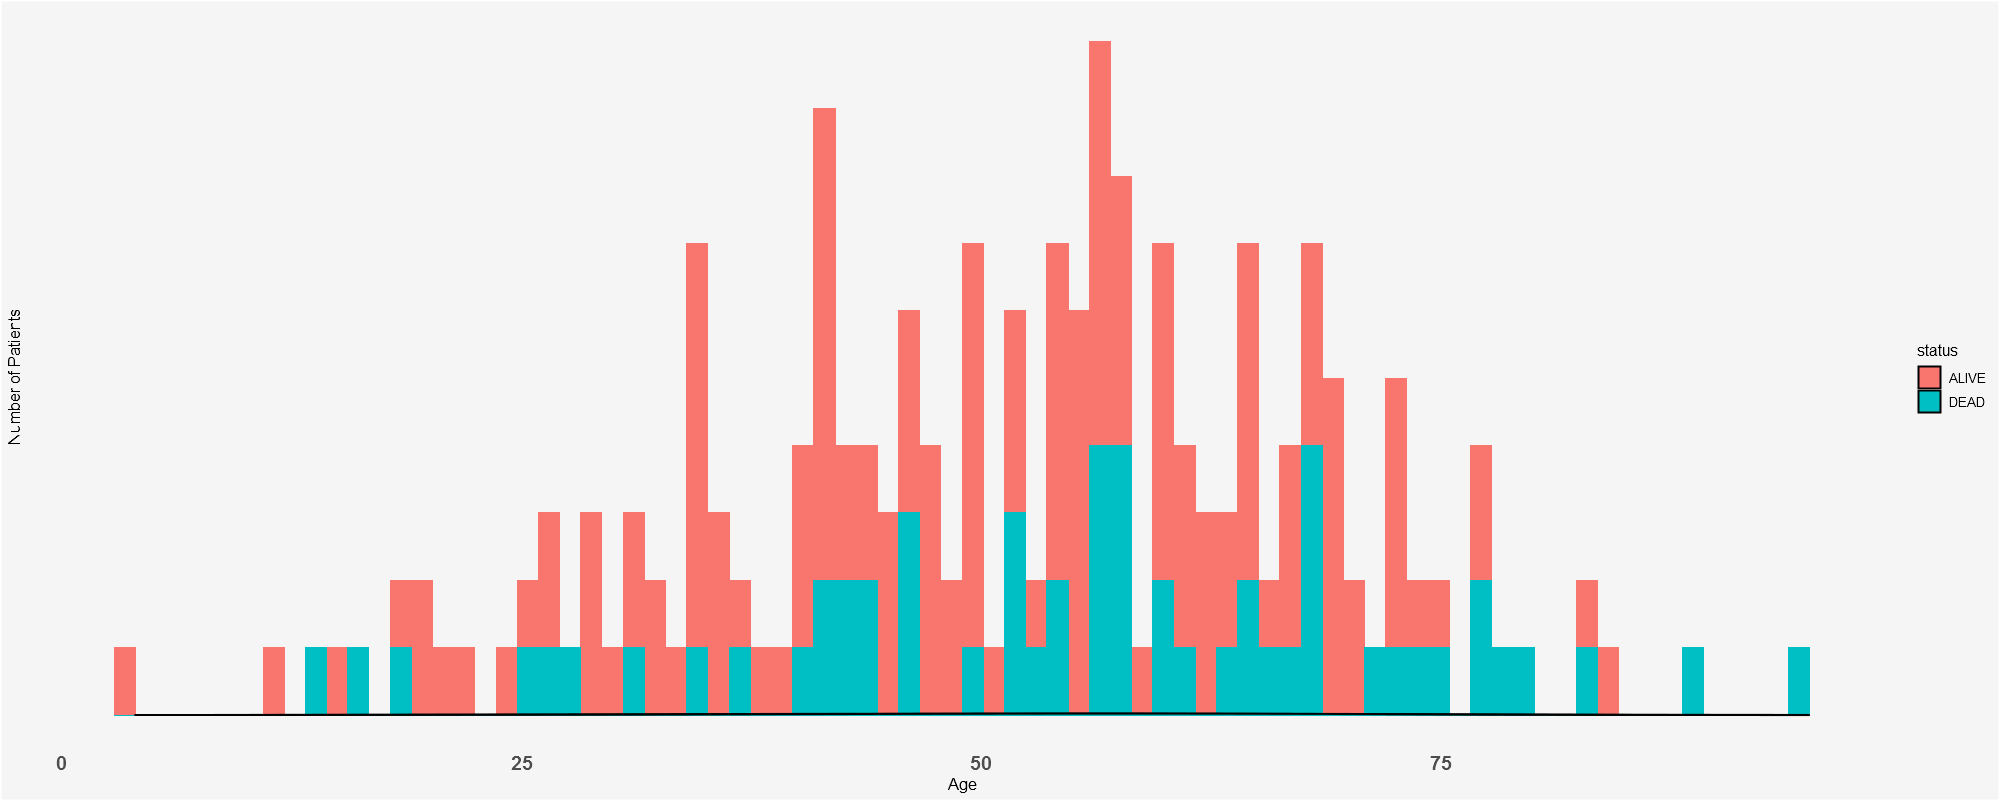

In [5]:
mela$age %>% summary
mela %>% 
  ggplot(aes(age, fill=status))+
  geom_histogram(bins=80)+
  geom_density()+
  labs(x="Age",y="Number of Patients")+
  theme(axis.ticks = element_blank(),
        panel.grid = element_blank(),
        panel.background = element_rect("gray96"),
        plot.background = element_rect("gray96"),
        legend.background = element_rect("gray96"),
        axis.text = element_text(size=13, face="bold"),
        axis.text.y = element_blank())

A boxplot is used to look at the different **stages**, **status** and **time** of melanoma patients   
It seems to show that there is a critical time frame of 5 years based on the status of the patients for all stages (which matches the initial research for the survival rates)

status,q
<fct>,<dbl>
ALIVE,0.09589041
ALIVE,5.09041096
ALIVE,6.50410959
ALIVE,9.12191781
ALIVE,15.24657534
DEAD,0.50684932
DEAD,1.96712329
DEAD,2.90958904
DEAD,4.56712329


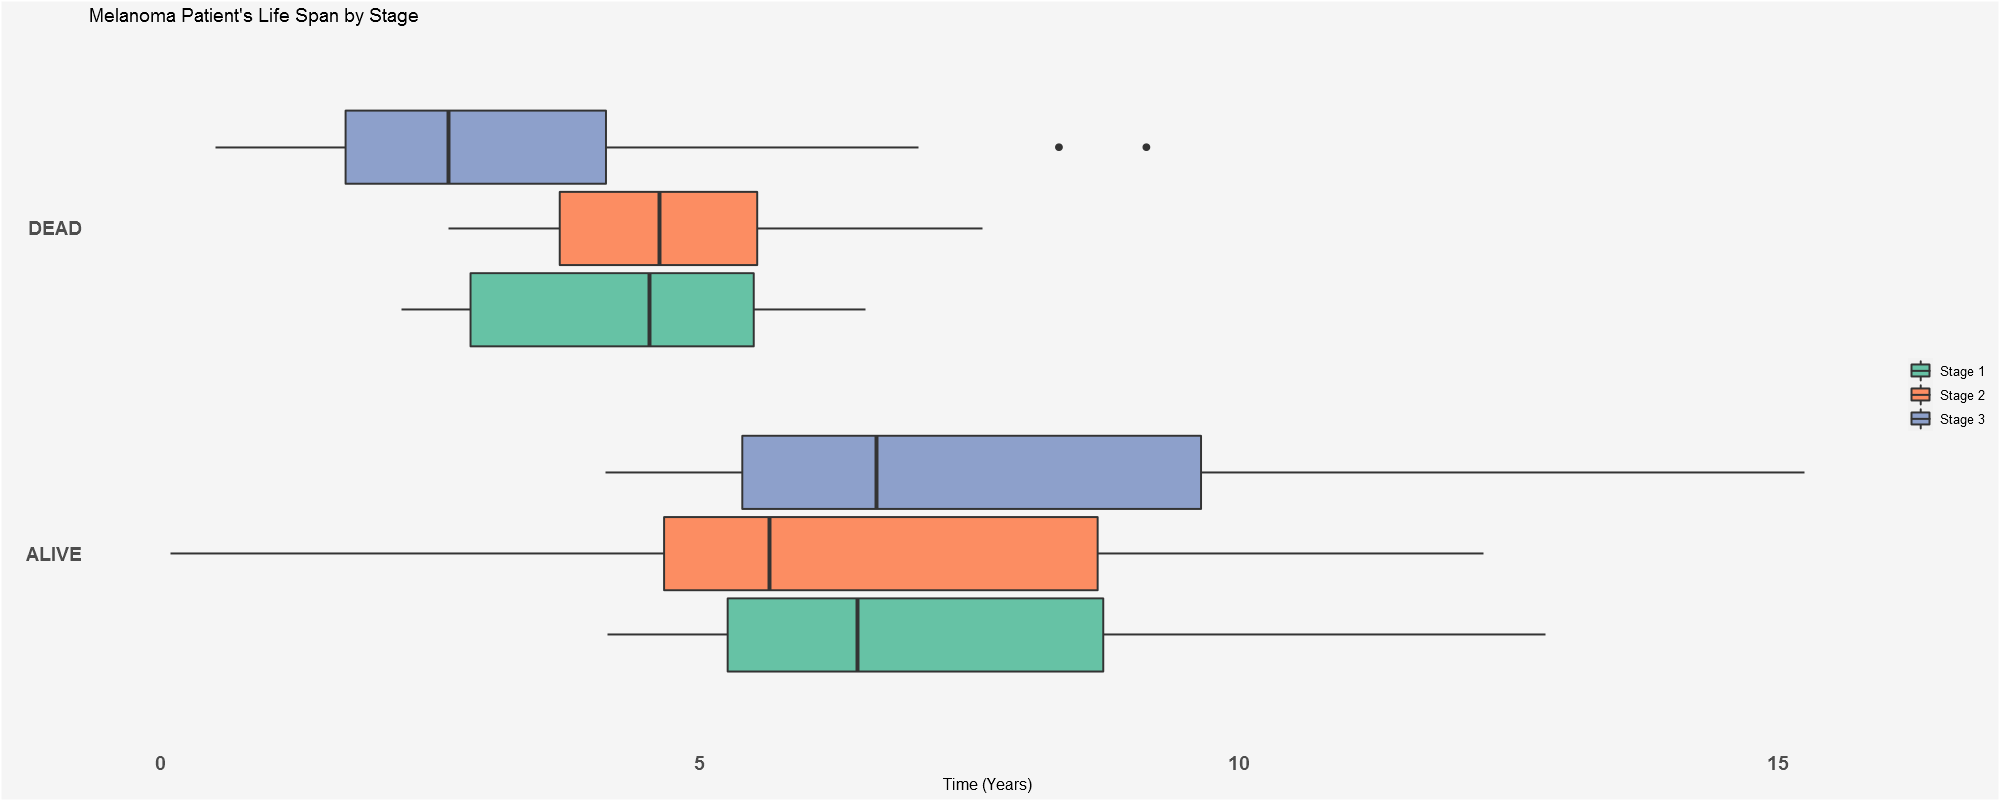

In [6]:
#Boxplot IQR values of average years in Status
mela %>%
  dplyr::group_by(status) %>%
  dplyr::summarise(q=quantile(time), .groups='drop') %>% paged_table

mela %>%
  ggplot(aes(status,time,fill=Stage))+
  geom_boxplot()+
  coord_flip()+
  labs(x="",y="Time (Years)",title="Melanoma Patient's Life Span by Stage")+
  scale_fill_brewer(palette="Set2",direction=0)+
  theme(axis.ticks = element_blank(),
        panel.grid = element_blank(),
        panel.background = element_rect("gray96"),
        plot.background = element_rect("gray96"),
        legend.background = element_rect("gray96",),
        legend.title = element_blank(),
        axis.text = element_text(size=13, face="bold"))

+ Female patients are twice as likely to live through melanoma than male patients   
+ Presence of an ulceration show survival rates to be 50 - 50 regardless of sex   
+ Patients are 5.7 times more likely to survive if they do not show ulceration

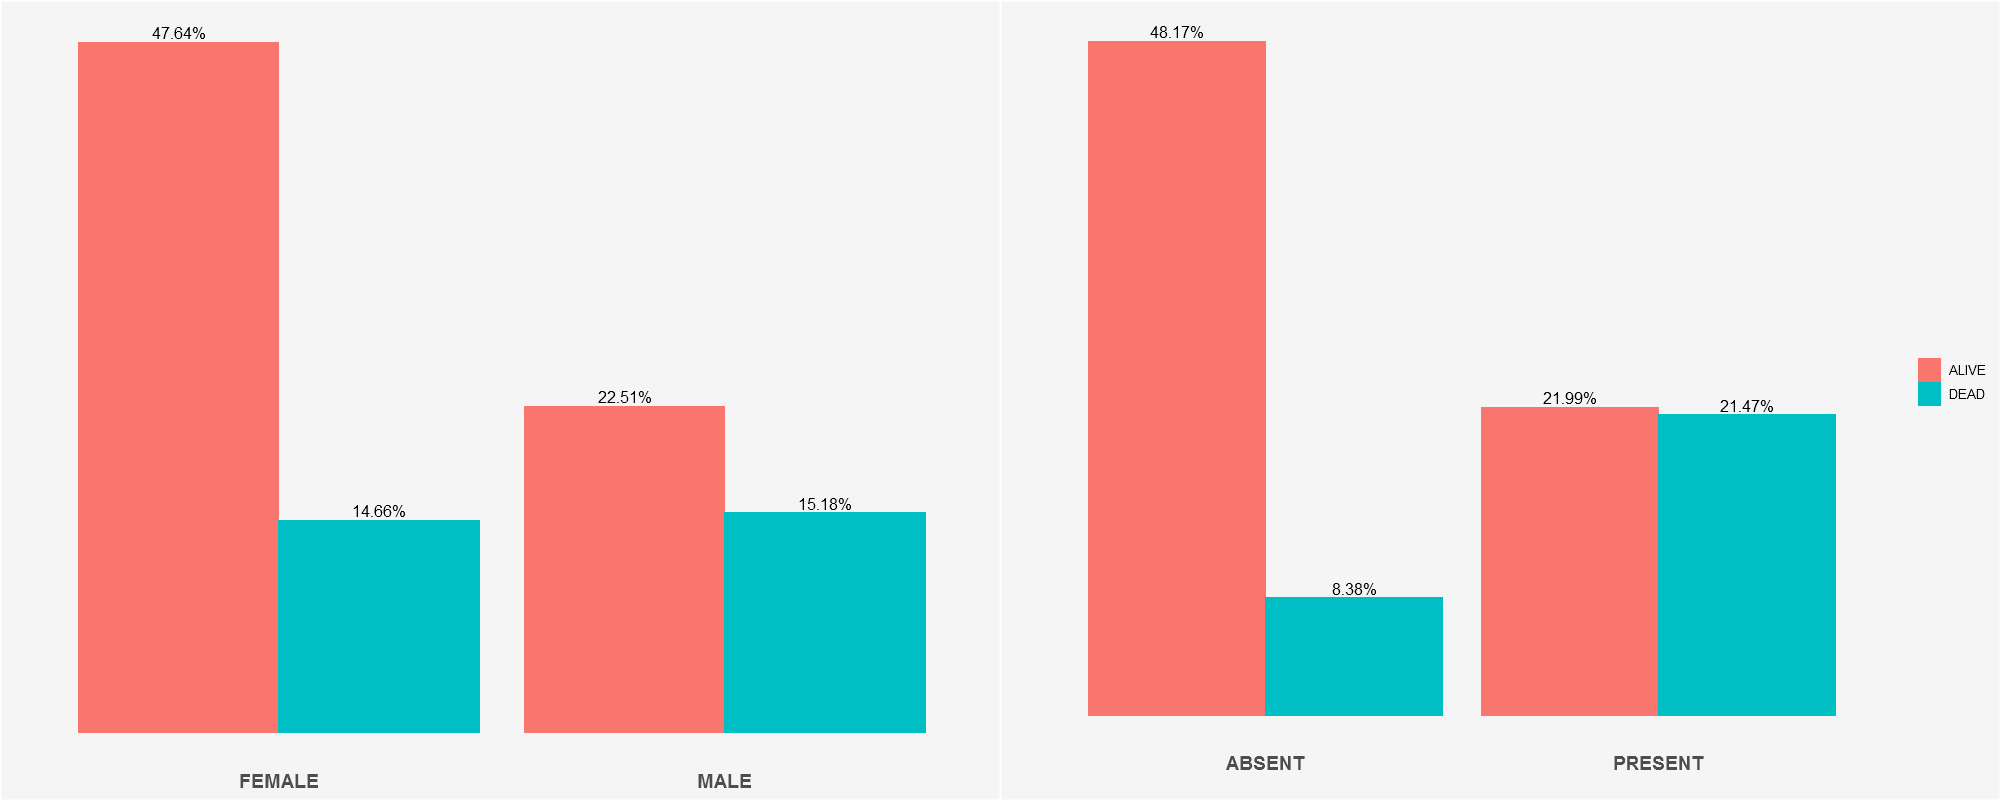

In [7]:
sex.status <- mela %>%
  ggplot(aes(sex,fill=status))+
  geom_bar(aes(y=(..count..)/sum(..count..)),
           position="dodge")+
  geom_text(aes(y=((..count..)/sum(..count..)),
                label=scales::percent((..count..)/sum(..count..))),
                stat = "count",
                position=position_dodge(0.9),vjust=-0.25)+
  theme(axis.ticks = element_blank(),
        panel.grid = element_blank(),
        panel.background = element_rect("gray96"),
        plot.background = element_rect("gray96"),
        legend.background = element_rect("gray96"),
        axis.text = element_text(size=13, face="bold"),
        axis.text.y = element_blank(),
        axis.title = element_blank(),
        legend.position = "none")

ulcer.status <- mela %>%
  ggplot(aes(ulcer,fill=status))+
  geom_bar(aes(y=(..count..)/sum(..count..)),
           position="dodge")+
  geom_text(aes(y=((..count..)/sum(..count..)),
                label=scales::percent((..count..)/sum(..count..))),
                stat = "count",
                position=position_dodge(0.9),vjust=-0.25)+
  labs(x="",y="")+
  theme(axis.ticks = element_blank(),
        panel.grid = element_blank(),
        panel.background = element_rect("gray96"),
        plot.background = element_rect("gray96"),
        legend.background = element_rect("gray96"),
        legend.title = element_blank(),
        axis.text = element_text(size=13, face="bold"),
        axis.text.y = element_blank())

grid.arrange(sex.status,ulcer.status,ncol=2)

+ In general, regardless of sex, patients without ulceration have a better chance of survival (with females having a higher    likelihood) whereas patients with an ulceration seem to have a 50 - 50 chance of survival   
+ Females without ulceration are 8.5 times likely to survive   
+ Males without ulceration are 3 times more likely to survive   
+ Essentially it becomes more crucial with age

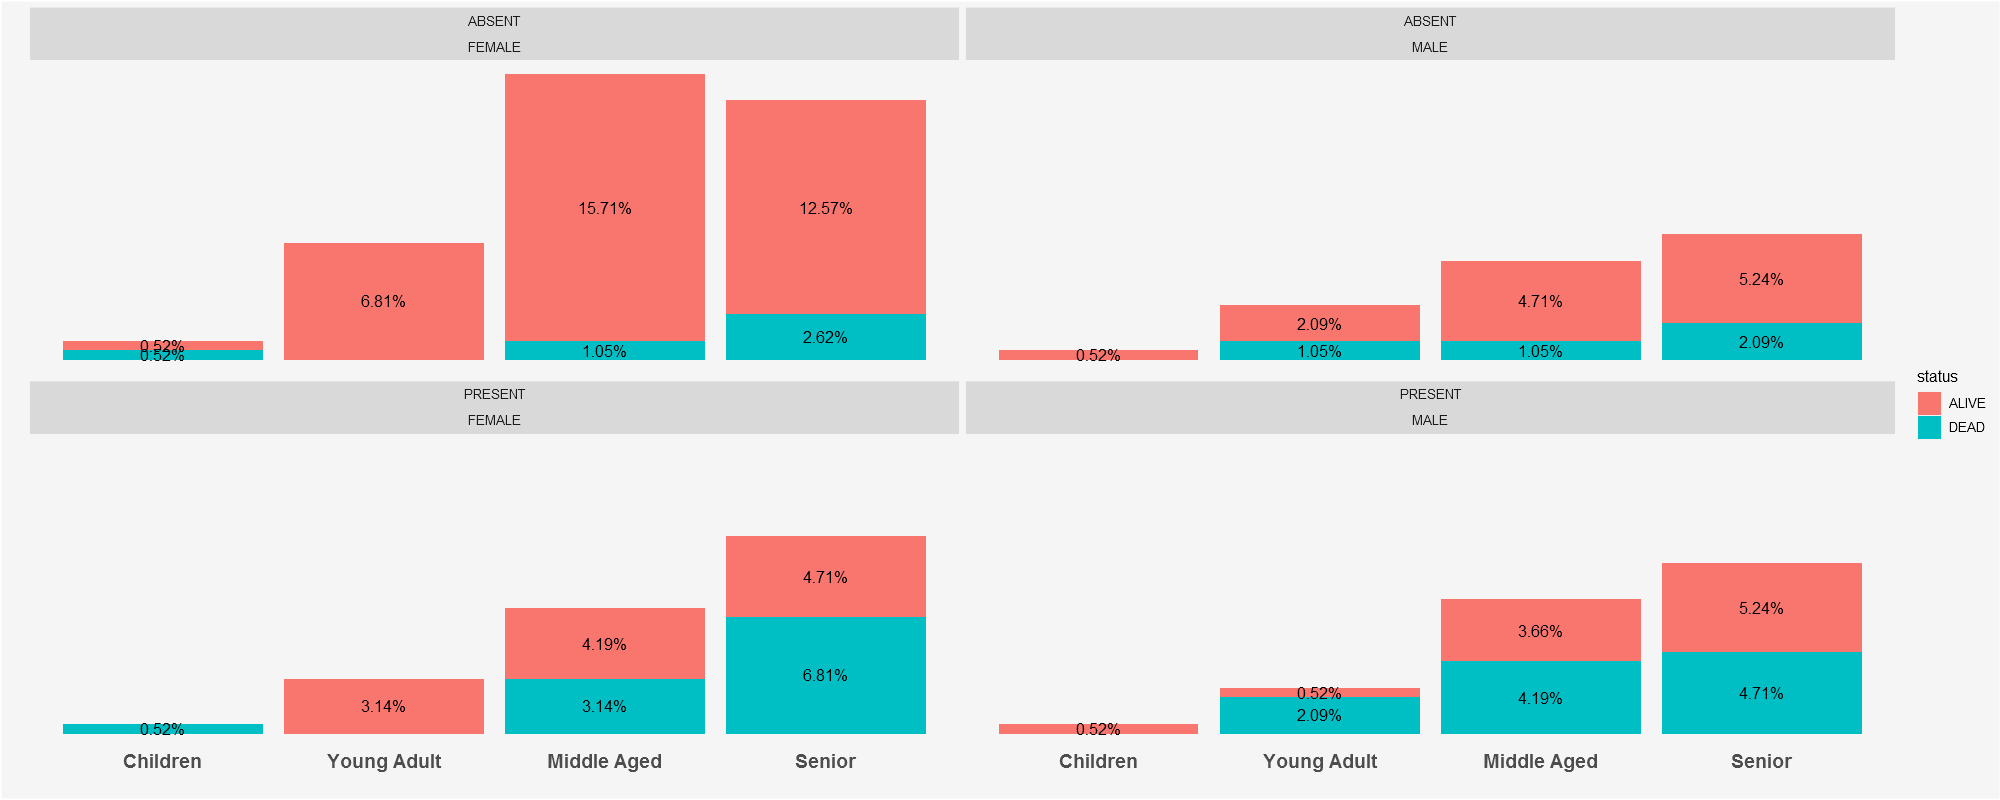

In [8]:
mela %>%
  ggplot(aes(Group,fill=status))+
  facet_wrap(ulcer~sex)+
  geom_bar(aes(y=(..count..)/sum(..count..)))+
  geom_text(aes(y=((..count..)/sum(..count..)),
                label=scales::percent((..count..)/sum(..count..))),
                stat = "count",
                position=position_stack(0.5))+
  labs(x="",y="")+
  theme(axis.ticks = element_blank(),
        panel.grid = element_blank(),
        panel.background = element_rect("gray96"),
        plot.background = element_rect("gray96"),
        legend.background = element_rect("gray96"),
        axis.text = element_text(size=13, face="bold"),
        axis.text.y = element_blank())

+ Most deaths occur in patients with an ulceration and larger thicknesses   
+ Patients without an ulceration generally have a smaller thickness

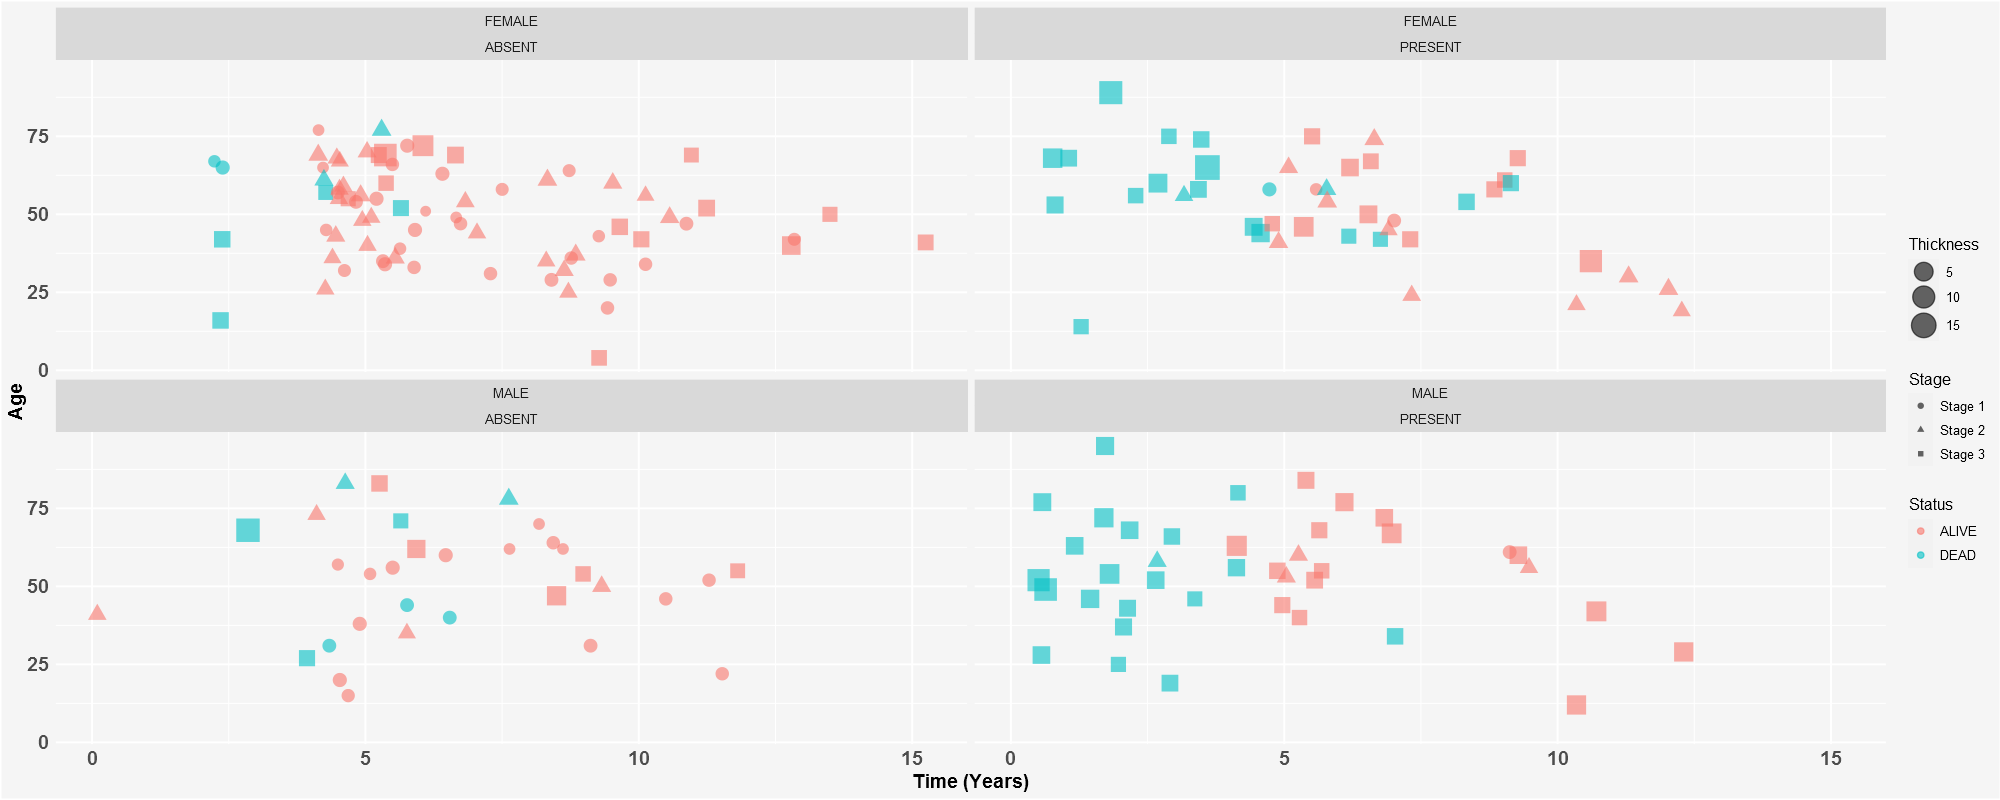

In [9]:
mela %>% 
  ggplot(aes(time, age, shape=Stage, color=status, size=thickness))+
  facet_wrap(sex~ulcer)+
  geom_point(alpha=0.6)+
  scale_size(range = c(3,8))+
  labs(x="Time (Years)",y="Age",color="Status",size="Thickness")+
  theme(axis.ticks = element_blank(),
        panel.background = element_rect("gray96"),
        plot.background = element_rect("gray96"),
        legend.background = element_rect("gray96"),
        axis.text = element_text(size=13, face="bold"),
        axis.title = element_text(size=13, face="bold"))

**Crossplots** show:
+ Survival rates starts to show significant increase after 4+ years
+ Age is unlikely a potential factor although patients over the age of 73 show to have less than a 45% survival rate
+ The presence of an ulceration shows to have 50% survival rate
+ The absence of an ulceration shows to have around an 85% survival rate
+ Survival rates are about 80% for Young Adults and Middle Aged patients while around 60% in Children and Seniors patients
+ Male survival rate is about 60%
+ Female survival rate is over 75%
+ Larger thicknesses show a higher probability of a presence of an ulceration
+ Thicknesses larger than 3.54mm have about an average survival rate of 44%

Plotting transformed variable 'time' with 'equal_freq', (too many values). Disable with 'auto_binning=FALSE'

Plotting transformed variable 'age' with 'equal_freq', (too many values). Disable with 'auto_binning=FALSE'



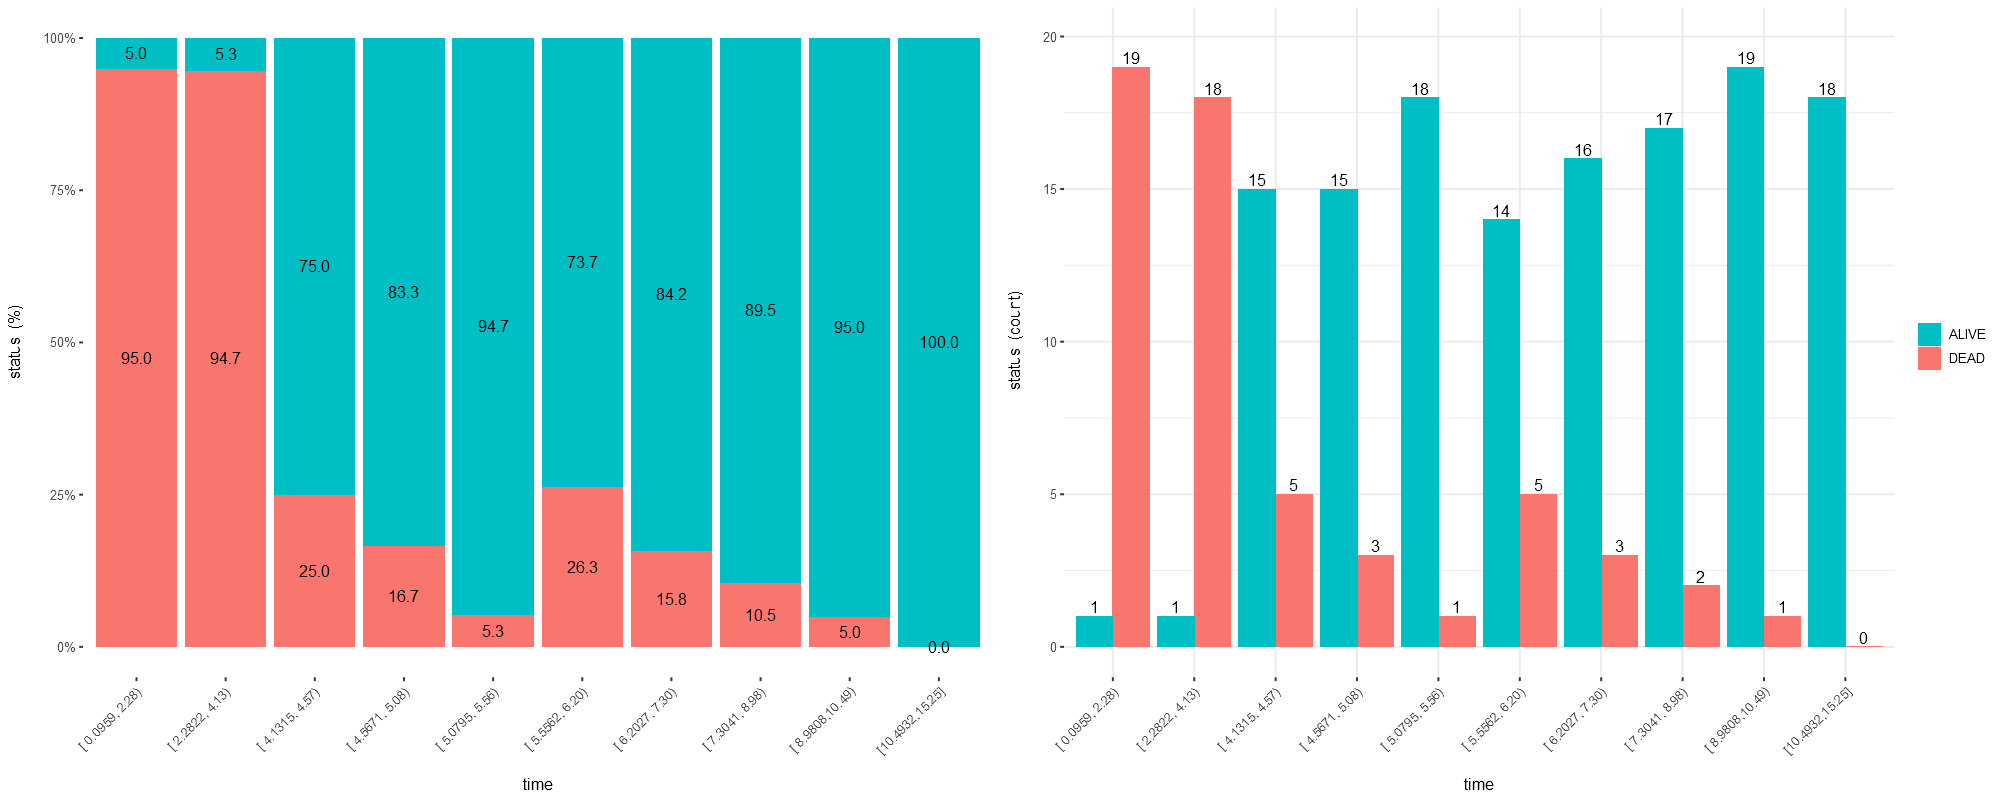

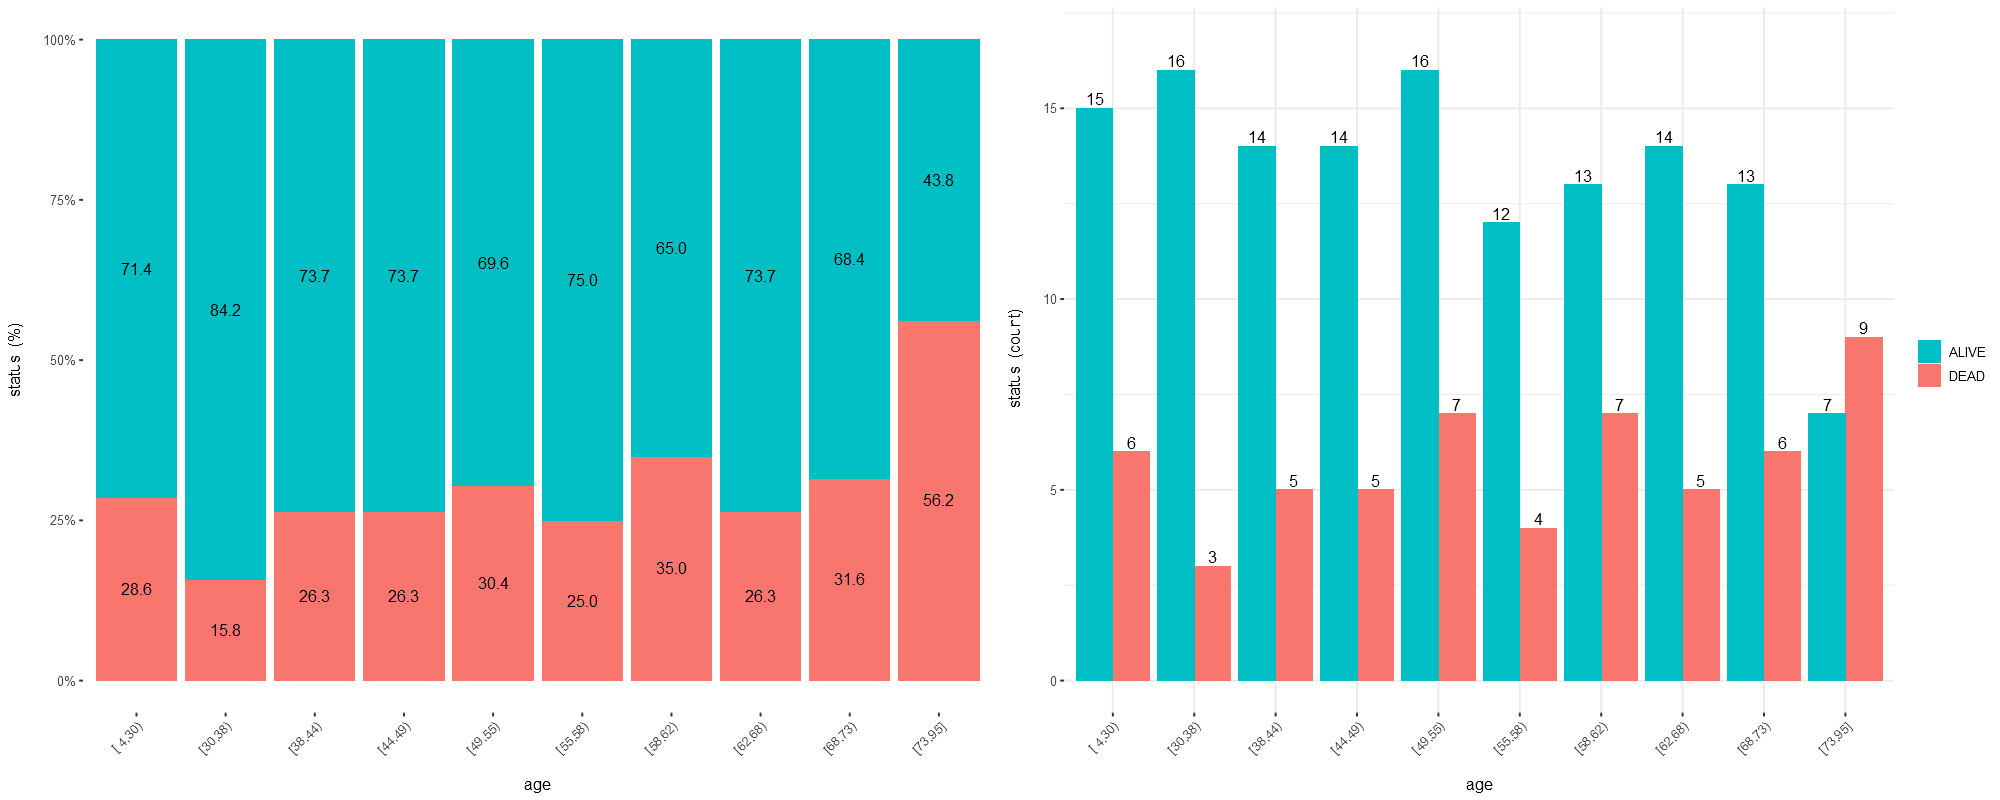

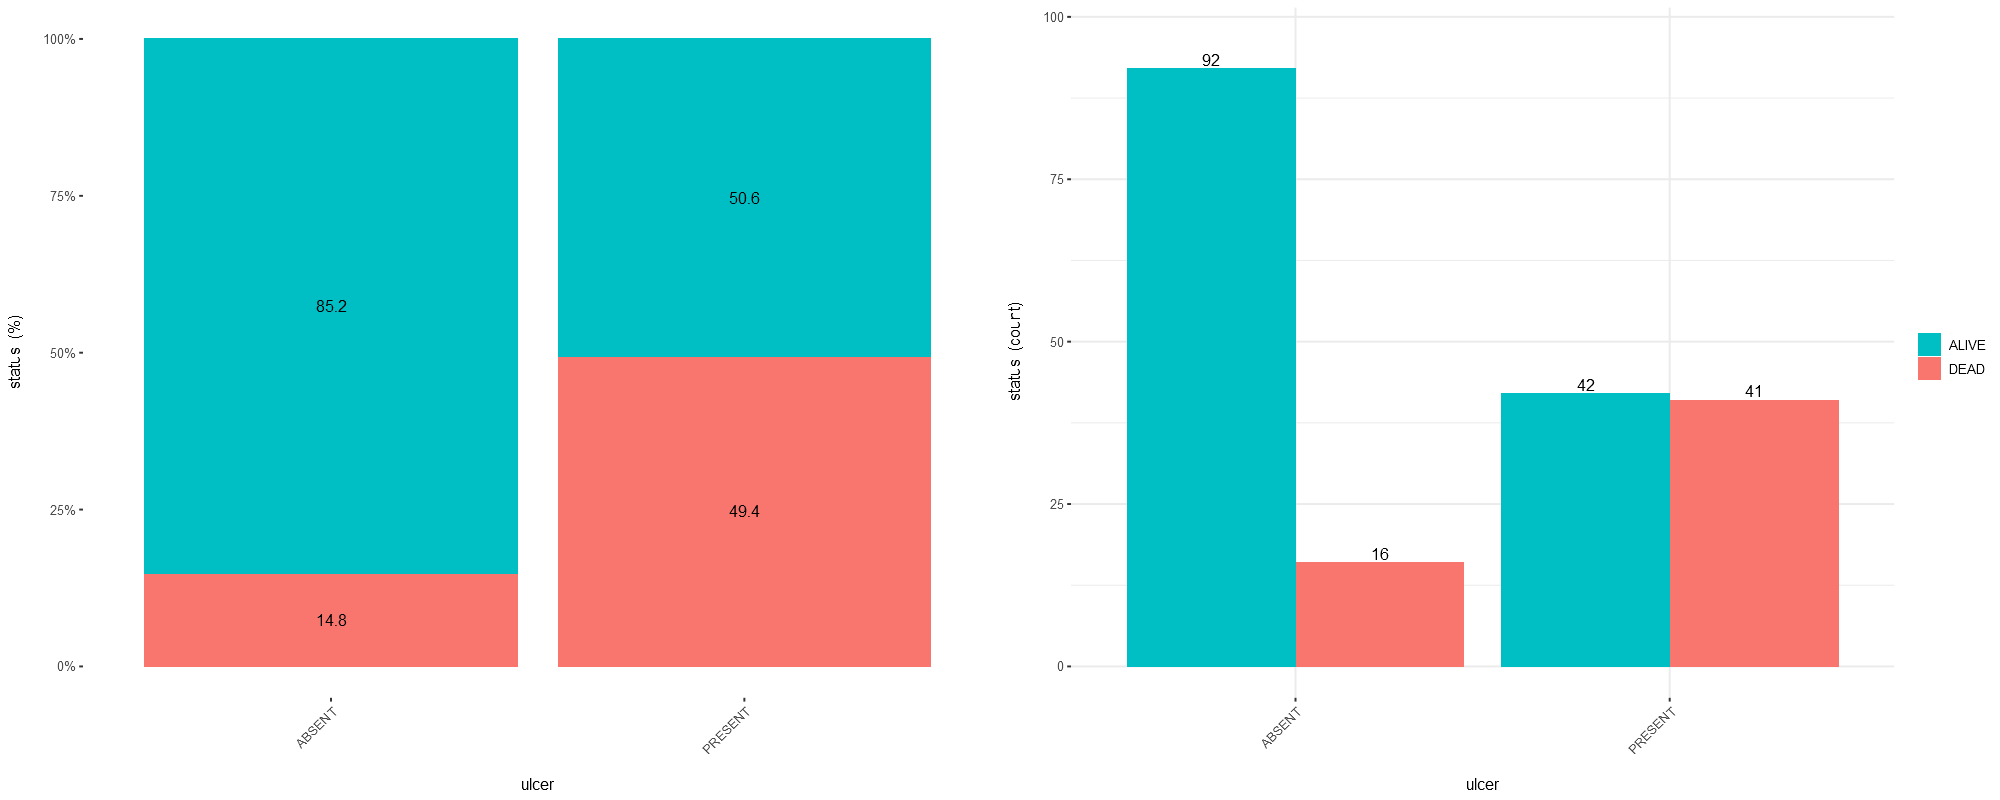

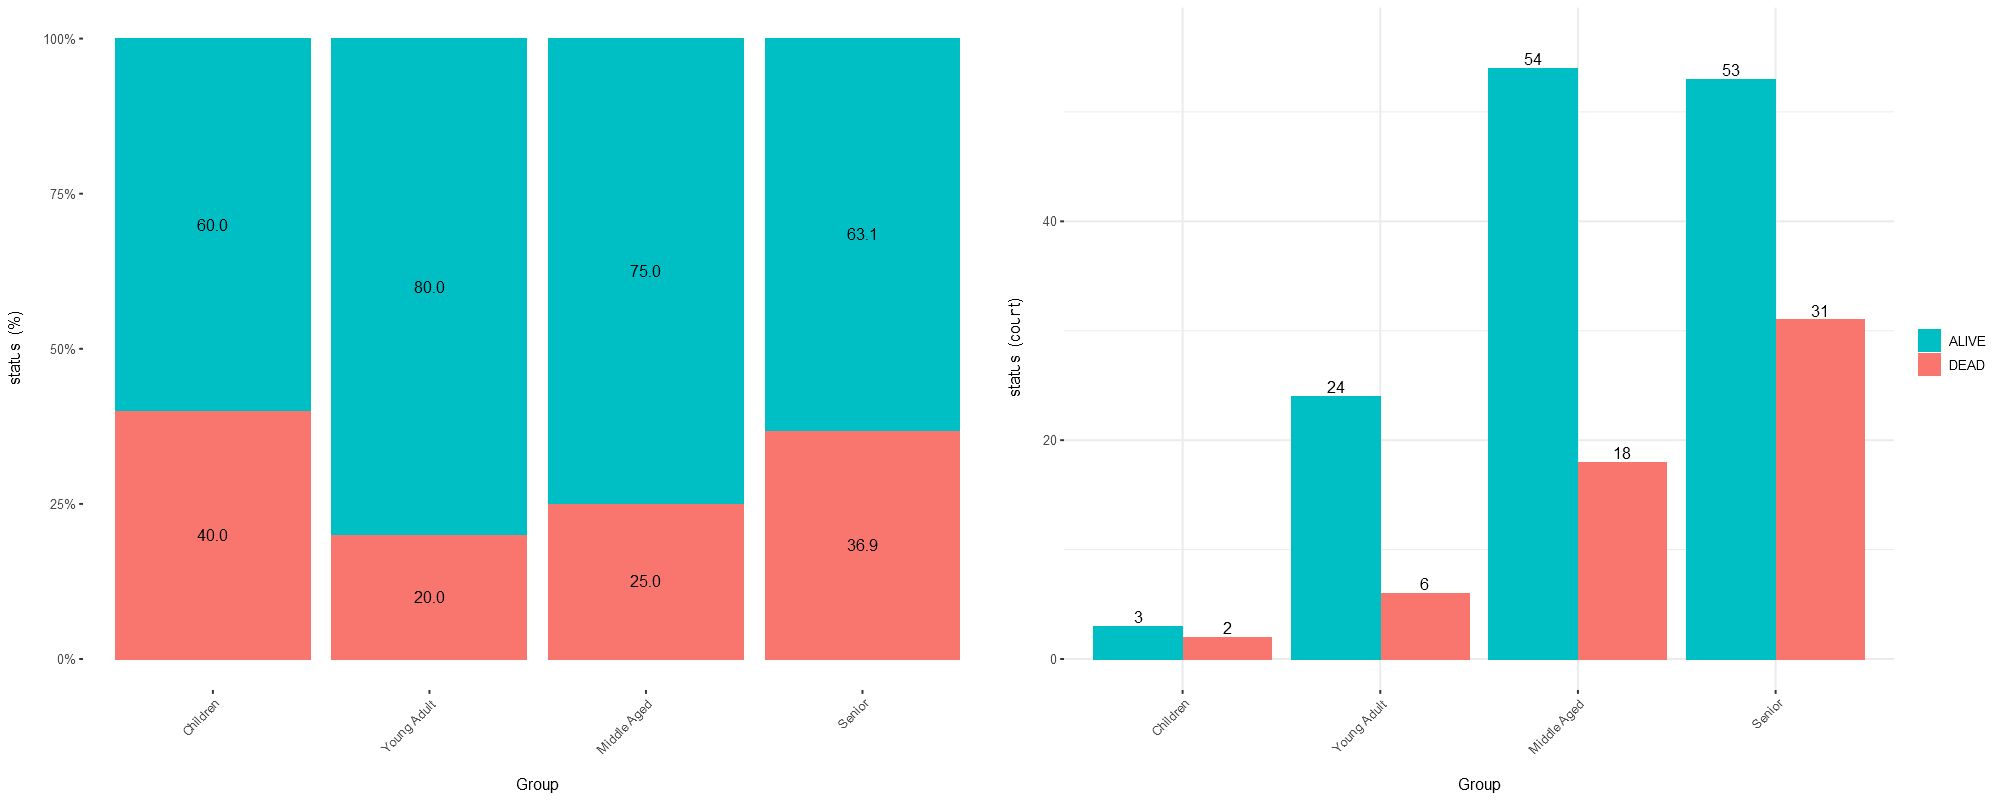

Plotting transformed variable 'thickness' with 'equal_freq', (too many values). Disable with 'auto_binning=FALSE'



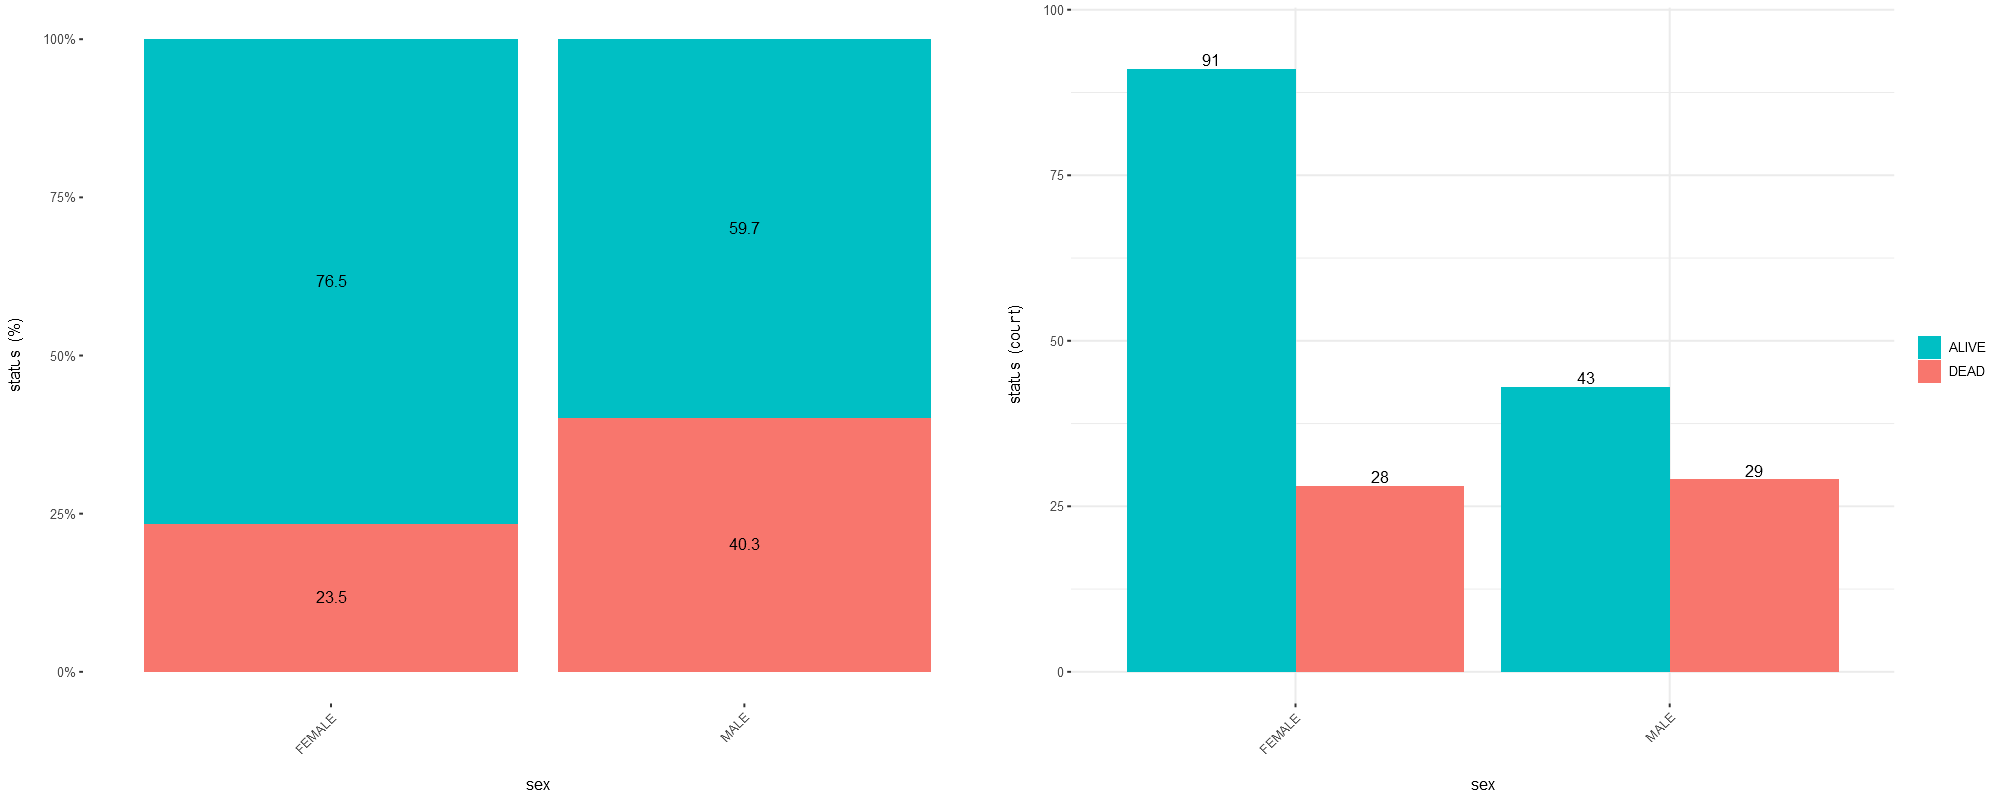

Plotting transformed variable 'thickness' with 'equal_freq', (too many values). Disable with 'auto_binning=FALSE'



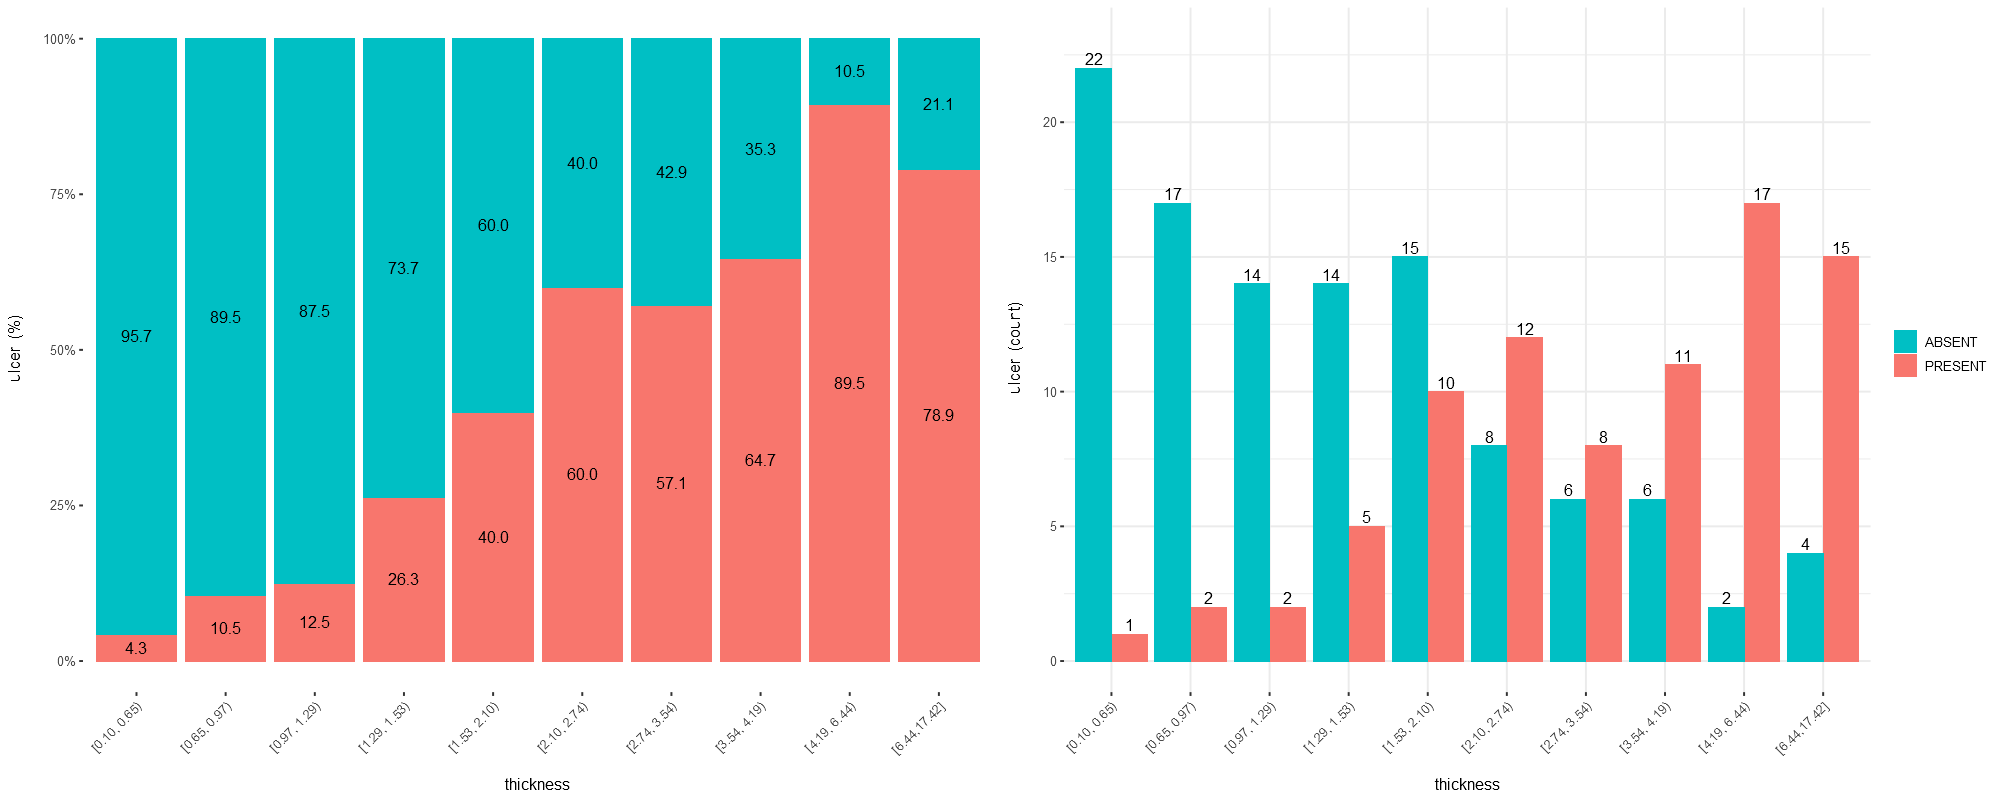

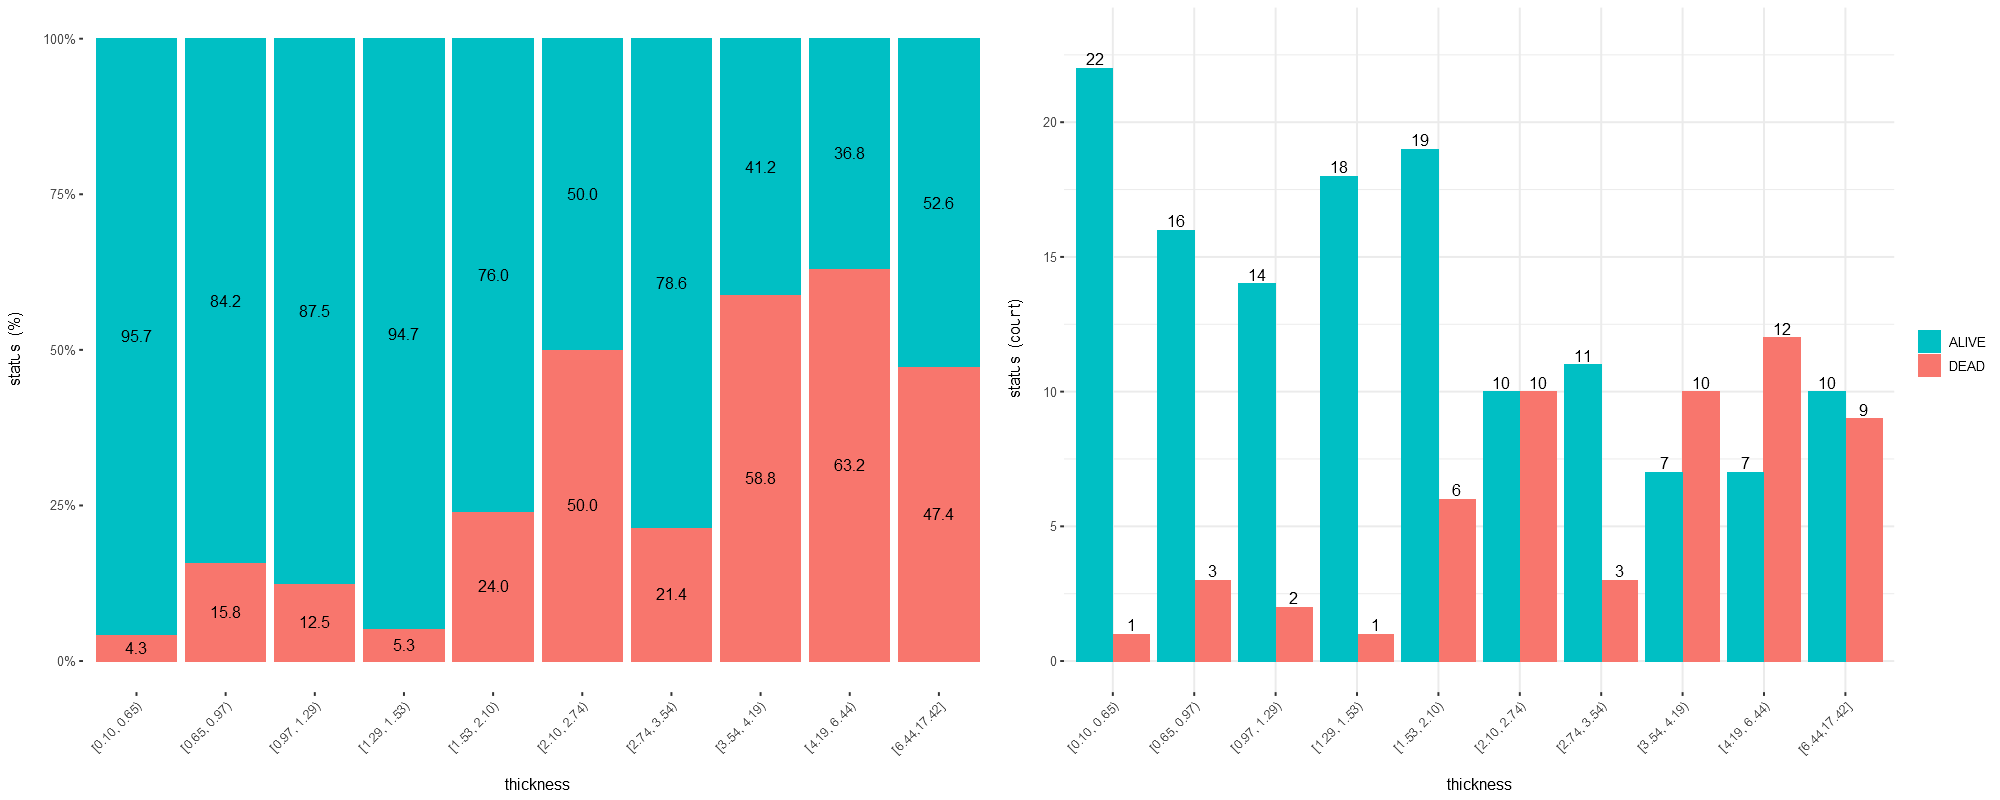

In [10]:
cross_plot(mela,input="time",target="status")
cross_plot(mela,input="age",target="status")
cross_plot(mela,input="ulcer",target="status")
cross_plot(mela,input="Group",target="status")
cross_plot(mela,input="sex",target="status")
cross_plot(mela,input="thickness",target="ulcer")
cross_plot(mela,input="thickness",target="status")

**Research Question:** Does thickness and/or ulcerated tumors have an increase chance of death from malignant melanoma?  


## Takeaways | Exploratory Data Analysis shows: 
Yes, both thickness and presence of a ulcerated tumor increases the chance of death from malignant melanoma.
+ Females are twice as likely to survive than males
+ The first 4 years are the most crucial (majority of deaths occur between 2 - 4.5 years with an average of 3.5 years)
+ Essentially it becomes more crucial with age
+ Factors that **worsen chances of survival** are:
    + Larger thicknesses (over 3.54mm have about an average survival rate of 56%)
    + The presence of an ulceration (survival rates drop to 50 - 50, regardless of sex)
        + **Note:** Larger thicknesses shows a higher probability in the formation of an ulceration